# Impact of rainfall temporal distribution on flooding in Lin Dyke catchment


## Project Summary

Research suggests that the temporal distribution of rainfall within a storm event can influence the nature and severity of flooding resulting from that storm event....

Testing this using synthetic rainfall events derived from FEH/ReFH2. Standard profiles usually have one peak, testing three methods for splitting the total rainfall amount normally concentrated in this one peak into multiple peaks 

Analysing impact on the extent, depth and velocity of flooding, and the spatial distribution of these variables over the catchment

### Code initialisation

In [122]:
array = xarray_dataarray.values
normed_data = (array - array.min()) / (array.max() - array.min())    
cm = plt.cm.get_cmap(cmap)    


In [ ]:
# Prepare for plotting with Folium

# Create discrete cmap
colors_list = [mpl.cm.Blues(0.2), mpl.cm.Blues(0.5), mpl.cm.Blues(0.7),"navy"]
cmap = mpl.colors.ListedColormap(colors_list)

def prep_for_folium_plotting(input_raster_fp):
    # Open dataset using rioxarray
    xarray_dataarray = rxr.open_rasterio(input_raster_fp ,masked=True).squeeze()
    # reproject
    xarray_dataarray = xarray_dataarray.rio.reproject("EPSG:4326")
    # Set no data values to np.nan
    xarray_dataarray  = xarray_dataarray.where(xarray_dataarray>nodata, np.nan)
    
#     return xarray_dataarray

# def create

    
# def plot_with_folium(list_of_dataarrays)


    # Get coordinates needed in plotting
    clat, clon = xarray_dataarray.y.values.mean(), xarray_dataarray.x.values.mean()
    mlat, mlon = xarray_dataarray.y.values.min(), xarray_dataarray.x.values.min()
    xlat, xlon = xarray_dataarray.y.values.max(), xarray_dataarray.x.values.max()

    
    
#     # function to color data
#     def colorize(array, cmap='viridis'):
#         normed_data = (array - array.min()) / (array.max() - array.min())    
#         cm = plt.cm.get_cmap(cmap)    
#         return cm(normed_data)  
    
    # Apply colormap
    data   = ma.masked_invalid(xarray_dataarray.values)
    cm = plt.cm.get_cmap(cmap) 
    colored_data = cm(data)
    
    # Set up figure
    f = folium.Figure(width=800, height=700)
    
    # Create base map
    mapa = folium.Map(location=[clat, clon], tiles="OpenStreetMap",zoom_start=13).add_to(f)
    # Add raster data
    folium.raster_layers.ImageOverlay(colored_data, [[mlat, mlon], [xlat, xlon]], opacity=0.7,interactive=True).add_to(mapa)
    # Add catchment boundary
    folium.GeoJson(data=gdf["geometry"]).add_to(mapa)
    
    # Print map
    display(mapa)

prep_for_folium_plotting("Arcpy/classified_depth_dividetime.tiff".format(key))


CRS.from_epsg(4326)

In [82]:
%matplotlib inline
key = 'dividetime'
import xarray as xr
import numpy.ma as ma
import folium

from IPython.display import IFrame
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
          
# Specify catchment area to add to plot
my_shp = "MeganModel/CatchmentLinDyke_exported.shp"
gdf = gpd.read_file(my_shp)    
gdf = gdf.to_crs(4326)


# da_dem  = xr.open_rasterio(infile).drop('band')[0].rename({'x':'longitude', 'y':'latitude'})
da_dem = lidar_dem_wgs84

# nodata  = da_dem.nodatavals[0]
da_dem  = da_dem.where(da_dem>nodata, np.nan)
arr_dem = da_dem.values

clat = da_dem.y.values.mean()
clon = da_dem.x.values.mean()

mlat = da_dem.y.values.min()
mlon = da_dem.x.values.min()

xlat = da_dem.y.values.max()
xlon = da_dem.x.values.max()

print(clat, clon, mlat, mlon, xlat, xlon)

# # Create discrete cmap
colors_list = [mpl.cm.Blues(0.2), mpl.cm.Blues(0.5), mpl.cm.Blues(0.7),"navy"]
#colors_list = ['turquoise','teal', 'blue', 'navy']
cmap = mpl.colors.ListedColormap(colors_list)
cmap.set_over('red')
cmap.set_under('green')

def colorize(array, cmap='viridis'):
    normed_data = (array - array.min()) / (array.max() - array.min())    
    cm = plt.cm.get_cmap(cmap)    
    return cm(normed_data)  

data   = ma.masked_invalid(arr_dem)
colored_data = colorize(data, cmap=cmap)


f = folium.Figure(width=800, height=700)

mapa = folium.Map(location=[clat, clon], 
                  tiles="Stamen Terrain",
                  zoom_start=13).add_to(f)

folium.raster_layers.ImageOverlay(colored_data,
                                  [[mlat, mlon], [xlat, xlon]],
                                  opacity=0.7,interactive=True).add_to(mapa)

folium.GeoJson(data=gdf["geometry"]).add_to(mapa)

mapa

53.768306874761016 -1.3756056884868098 53.73292246599252 -1.4406027609229652 53.8036912835295 -1.3106086160506543


In [99]:
from folium import Map, FeatureGroup, Marker, LayerControl

# mapa = Map(location=[35.11567262307692,-89.97423444615382], zoom_start=12,
#            tiles='Stamen Terrain')
# feature_group1 = FeatureGroup(name='Tim')
# feature_group2 = FeatureGroup(name='Andrew')
# feature_group1.add_child(Marker([35.035075, -89.89969], popup='Tim'))
# feature_group2.add_child(Marker([35.821835, -90.70503], popup='Andrew'))
# mapa.add_child(feature_group1)
# mapa.add_child(feature_group2)
# mapa.add_child(LayerControl())

f = folium.Figure(width=800, height=700)
mapa = folium.Map(location=[clat, clon], 
                  tiles="OpenStreetMap",
                  zoom_start=13).add_to(f)
folium.GeoJson(data=gdf["geometry"]).add_to(mapa)
feature_group1 = FeatureGroup(name='Single peak')
# feature_group2 = FeatureGroup(name='Divide time')
feature_group1.add_child(folium.raster_layers.ImageOverlay(colored_data,
                                  [[mlat, mlon], [xlat, xlon]],
                                  opacity=0.7,interactive=True, popup='Tim'))

# feature_group1.add_child(Marker([35.035075, -89.89969], popup='Tim'))
# feature_group2.add_child(Marker([35.821835, -90.70503], popup='Andrew'))
mapa.add_child(feature_group1)
# mapa.add_child(feature_group2)
mapa.add_child(LayerControl())

mapa


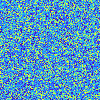

In [99]:
import folium
# from folium.plugins import ImageOverlay
from folium.raster_layers import ImageOverlay
import numpy as np
from matplotlib import cm

z = np.random.rand(100, 100)
m = folium.Map([50, -80], zoom_start=6, tiles='stamentoner')

# # Bounds
# min_lat, max_lat = 48.77, 60
# min_lon, max_lon = -9.05, 5

# # Make the map
# m = folium.Map(location=[53.8 , -1.54], tiles='Stamen Terrain', zoom_start=10,max_zoom=18, min_zoom=5)

z = np.random.rand(100, 100)
m = folium.Map([50, -80], zoom_start=6, tiles='stamentoner')
# m = folium.Map([30, -80], zoom_start=6, tiles='stamentoner')
folium.raster_layers.ImageOverlay(
    image=z,
    name='sample map',
    opacity=1,
    bounds=[[25, -75.], [35., -85.]],
    interactive=False,
    cross_origin=False,
    zindex=1,
    colormap=cm.viridis
).add_to(m)
folium.LayerControl().add_to(m)
m

In [73]:


# # Specify catchment area to add to plot
# my_shp = "MeganModel/CatchmentLinDyke_exported.shp"
# gdf = gpd.read_file(my_shp)


#     # Set up plot instance
# fig, ax = plt.subplots(figsize=(20, 15))
# ax = mpl.pyplot.gca()
# cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)
# rasterio.plot.show((clipped, 1), ax= ax, cmap = cmap, norm = norm)
# gdf.plot(ax=ax, facecolor = 'None', edgecolor = 'black', linewidth = 4)

# # fig, ax = plt.subplots(figsize=(20, 15))
# # ax = mpl.pyplot.gca
# # # ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# # gdf.plot(ax=ax, facecolor = 'None', edgecolor = 'black', linewidth = 4)
# # # cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Stamen.Toner)
# # # cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Stamen.Terrain)
# # cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)
# # # cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenTopoMap)
# # # cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Stamen.TonerLabels)
# # # cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Stamen.Watercolor, zoom=12)
# # # cx.add_basemap(ax, crs = gdf.crs.to_string(), url = cx.providers.OpenStreetMap.Mapnik)
# # rasterio.plot.show((clipped, 1), ax= ax, cmap = cmap, norm = norm)

In [6]:
import rasterio
import rioxarray as rxr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import os
import fiona
import rasterio.plot
import matplotlib as mpl
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs
from pyproj import CRS
# from descartes import PolygonPatch
from PIL import Image
import matplotlib.colors as colors
from mycolorpy import colorlist as mcp
import matplotlib.patches as mpatches
import contextily as cx

from my_functions import *


os.chdir("../../../FloodModelling")

# Define whether to filter out values <0.1
remove_little_values = True

In [2]:
### Define the names of the methods, and the shorthand versions of the names used in the folder naming conventions
methods =  {'singlepeak' : 'sp', 'dividetime' : 'dt', 'subpeaktiming' : 'sp-t', 'maxspread': 'ms'}

In [3]:
# Define breaks to split the depths/velocities on
breaks_depths = np.array([0, 0.3, 0.6, 1.2, 100])  
labels_depth = ['<=0.3m', '0.3-0.6m', '0.6-1.2m', '>1.2m']
breaks_velocity = np.array([0,0.25,0.5,2,100])
labels_velocity = ["<=0.25m/s", "0.25-0.5m/s", "0.5-2m/s", ">2m/s"]

#### Read in rasters containing depths and extents using each of the methods, and store these in a dictionary

In [76]:
# For each method, read in the raster file containing the depth and velocity values and convert to array.   
# If "remove_little_values" is True, and therefore we want to consider only cells with flooding > 0.1m then:
# set any values in the depth array which are less than 0.1 to 0 and also set the equivalent cells in the velocity array to 0.

# Create dictionaries to store the rasters for both depth and velocity
depth_rasters_dict = {}
velocity_rasters_dict = {}

# Populate the dictionaries with the depth/velocity rasters
# Filter out values which have a depth of <0.1m
for key, value in methods.items():
    
    # Clip the raster files
    velocity_raster, out_meta = open_and_clip("MeganModel/6hr_{}_u/6hr_{}_velocity.Resampled.Terrain.tif".format(value, key),
                               "MeganModel/6hr_{}_u/6hr_{}_velocity.Resampled.Terrain_clipped.tif".format(value, key))    
    depth_raster, out_meta = open_and_clip("MeganModel/6hr_{}_u/6hr_{}_depth.Resampled.Terrain.tif".format(value, key),
                               "MeganModel/6hr_{}_u/6hr_{}_depth.Resampled.Terrain_clipped.tif".format(value, key))   
    # Set -9999 to NA
    velocity_raster[velocity_raster < -9998] = np.nan
    depth_raster[depth_raster < -9998] = np.nan    
    # Set cell values to Null in cells which have a value <0.1 in the depth raster
    if remove_little_values == True:
            depth_raster[depth_raster < 0.1] = 0
            velocity_raster[velocity_raster < 0.1] = 0
    # Save to dictionary 
    depth_rasters_dict[key] = depth_raster
    velocity_rasters_dict[key] = velocity_raster

#### Create versions of depth/velocity rasters which are classified into depth/velocity categories

In [79]:
# Populate the dictionaries with the depth/velocity rasters
# Filter out values which have a depth of <0.1m
for key, value in methods.items():

    # Classify
#     classified_depth = np.sum(np.dstack([(depth_rasters_dict[key] > b) for b in breaks_depths]), axis=2).astype(np.int32)   
    classified_velocity = np.sum(np.dstack([(velocity_rasters_dict[key] > b) for b in breaks_velocity]), axis=2).astype(np.int32)
    
    # Reset the np.nans as np.nans
#     classified_depth = np.where(np.isnan(depth_rasters_dict[key]), np.nan, classified_depth)
    classified_velocity = np.where(np.isnan(velocity_rasters_dict[key]), np.nan, classified_velocity)
    
#     # Save
#     save_array_as_raster(classified_depth, "Arcpy/classified_depth_{}.tiff".format(key),out_meta) 
#     plot_classified_depth("Arcpy/classified_depth_{}.tiff".format(key), "Arcpy/Figs/classified_depth_{}.png".format(key),
#                          labels_depth)    
        
    save_array_as_raster(classified_velocity, "Arcpy/classified_velocity_{}.tiff".format(key),out_meta)
    plot_classified_velocity("Arcpy/classified_velocity_{}.tiff".format(key), "Arcpy/Figs/classified_velocity_{}.png".format(key),
                           labels_velocity) 
    
#     ######################################################################################
#     ######################################################################################
#     # Find difference between depth/velocity rasters from this method, and the single peak method
#     ######################################################################################
#     ######################################################################################
#     if key != 'singlepeak':
#         # Depth
#         depth_difference_raster = depth_rasters_dict['singlepeak'] - depth_rasters_dict[key]
#         # Velocity
#         velocity_difference_raster = velocity_rasters_dict['singlepeak'] - velocity_rasters_dict[key]
#         # Save 
#         save_array_as_raster(depth_difference_raster, "Arcpy/depth_singlepeak_{}_diff.tiff".format(key),out_meta)
#         #plot("Arcpy/depth_singlepeak_{}_diff.tiff".format(key), "Arcpy/Figs/depth_singlepeak_{}_diff.png".format(key))    
        
#         save_array_as_raster(velocity_difference_raster, "Arcpy/velocity_singlepeak_{}_diff.tiff".format(key),out_meta)  
#         #plot("Arcpy/velocity_singlepeak_{}_diff.tiff".format(key), "Arcpy/Figs/velocity_singlepeak_{}_diff.png".format(key))  
        
#         ######################################################################################
#         ######################################################################################
#         # Reclassify the difference rasters to represent whether value is positive or negative 
#         ######################################################################################
#         ######################################################################################
#         # Depth
#         #pos_neg_depth_diff = np.where(np.isnan(depth_difference_raster), np.nan, np.where(depth_difference_raster <0, 0, 1)

#         classified_depth_difference_raster = depth_difference_raster.copy()
#         classified_depth_difference_raster[np.where( depth_difference_raster < -0.1 )] = 1
#         classified_depth_difference_raster[np.where((-0.1 <= depth_difference_raster) & (depth_difference_raster < 0.1)) ] = 2
#         classified_depth_difference_raster[np.where((0.1 <= depth_difference_raster) & (depth_difference_raster < 0.3)) ] = 3
#         classified_depth_difference_raster[np.where( depth_difference_raster >= 0.3  )] = 4

#         save_array_as_raster(classified_depth_difference_raster, 
#                              "Arcpy/classified_depth_singlepeak_{}_diff.tif".format(key),out_meta)  
#         plot_difference_levels( "Arcpy/classified_depth_singlepeak_{}_diff.tif".format(key),
#                                "Arcpy/Figs/classified_depth_singlepeak_{}_diff.png".format(key),
#            'depth')    
        
#         # Velocity
#         #pos_neg_velocity_diff = np.where(np.isnan(velocity_difference_raster), np.nan,np.where(velocity_difference_raster <0, 0, 1))
        
#         classified_velocity_difference_raster = velocity_difference_raster.copy()
#         classified_velocity_difference_raster[np.where( velocity_difference_raster < -0.1 )] = 1
#         classified_velocity_difference_raster[np.where((-0.1 <= velocity_difference_raster) & (velocity_difference_raster < 0.1)) ] = 2
#         classified_velocity_difference_raster[np.where((0.1 <= velocity_difference_raster) & (velocity_difference_raster < 0.3)) ] = 3
#         classified_velocity_difference_raster[np.where( velocity_difference_raster >= 0.3  )] = 4
        
#         save_array_as_raster(classified_velocity_difference_raster, 
#                              "Arcpy/classified_velocity_singlepeak_{}_diff.tif".format(key),out_meta)   
#         plot_difference_levels("Arcpy/velocity_singlepeak_{}_diff_reclassified.tif".format(key), 
#                                "Arcpy/Figs/classified_velocity_singlepeak_{}_diff.png".format(key),
#                                "velocity")

#### Find the proportion of cells in the catchment which were flooded with particular depths or velocities

In [61]:
results_dict = {}
for variable in ["depth", "velocity"]:
    counts_df = pd.DataFrame()
    proportions_df = pd.DataFrame()        

    for method_name, shortening in methods.items():    # Define filepath
        if variable == 'depth':
            raster = depth_rasters_dict[method_name]
        elif variable == 'velocity':
            raster = velocity_rasters_dict[method_name]
            
        unique, counts = np.unique(raster, return_counts=True)
        df = pd.DataFrame({'values': unique, 'counts':counts})

        # Cut by depth bins
        if variable == 'depth':
            df['bins']= pd.cut(unique, bins=breaks_depths, right=False)
        elif variable == 'velocity':
            df['bins']= pd.cut(unique, bins=breaks_velocity, right=False)
        groups = df.groupby(['bins']).sum()
        groups  = groups.reset_index()
        # Find the sum
        total_n_cells = groups ['counts'].sum()
        # Find the number of cells in each group as a proportion of the total
        groups['Proportion'] = round((groups['counts']/total_n_cells) *100,1)
        
        # Add values to dataframes
        counts_df[method_name] = groups['counts']
        proportions_df[method_name] = groups['Proportion']
        
    # Reset index to show the groups
    counts_df.reset_index(inplace=True)
    proportions_df.reset_index(inplace=True)
    
    # Set index values
    if variable == 'depth':
        counts_df['index'] = labels_depth
        proportions_df['index'] = labels_depth
    elif variable == 'velocity':
        counts_df['index'] = labels_velocity
        proportions_df['index'] = labels_velocity

    # Add to dictionary
    results_dict['{}_counts'.format(variable)] = counts_df
    results_dict['{}_props'.format(variable)] = proportions_df   

#  Flood extent 
To examine whether the rainfall's temporal distribution influences the total extent of flooding, the number of flooded cells and the total flooded area in km2 (incl. only cells with depth >0.1m) is compared between the profile with a single peak, and the three methods for producing multi-peaked rainfall events. 

In [62]:
# Create one dataframe with each column the total number of flooded cells for each method 
variable = 'velocity'
counts_df = results_dict['{}_counts'.format(variable)]
# totals_df = counts_df.append(counts_df.sum(numeric_only=True), ignore_index=True)
totals_df =pd.DataFrame(counts_df.sum(numeric_only=True)).T
totals_df = totals_df.iloc[[len(totals_df)-1]]
# totals_df.drop(columns = 'index', inplace = True)

# Convert this to the total flooded area for each method
totals_df_area = (totals_df * 25)/1000000

In [63]:
# Get a list of the percentage difference between the total number of flooded cells with a single peak and the methods for
# creating multiple peaks
ls = []
for method in methods.keys():
    if method!= 'singlepeak':
        ls.append((totals_df[method]/totals_df['singlepeak'] - 1).map('{:.2%}'.format).values[0])
ls = ['+'  + s for s in ls]
ls = [''] + ls

## Total number of flooded cells/flooded area for each rainfall distribution (depths>0.1m)
<!-- This is assuming grid cells are 5m by 5m - but need to check this is correct.  
This plot is the same whether you use depth or velocity as the variable -->

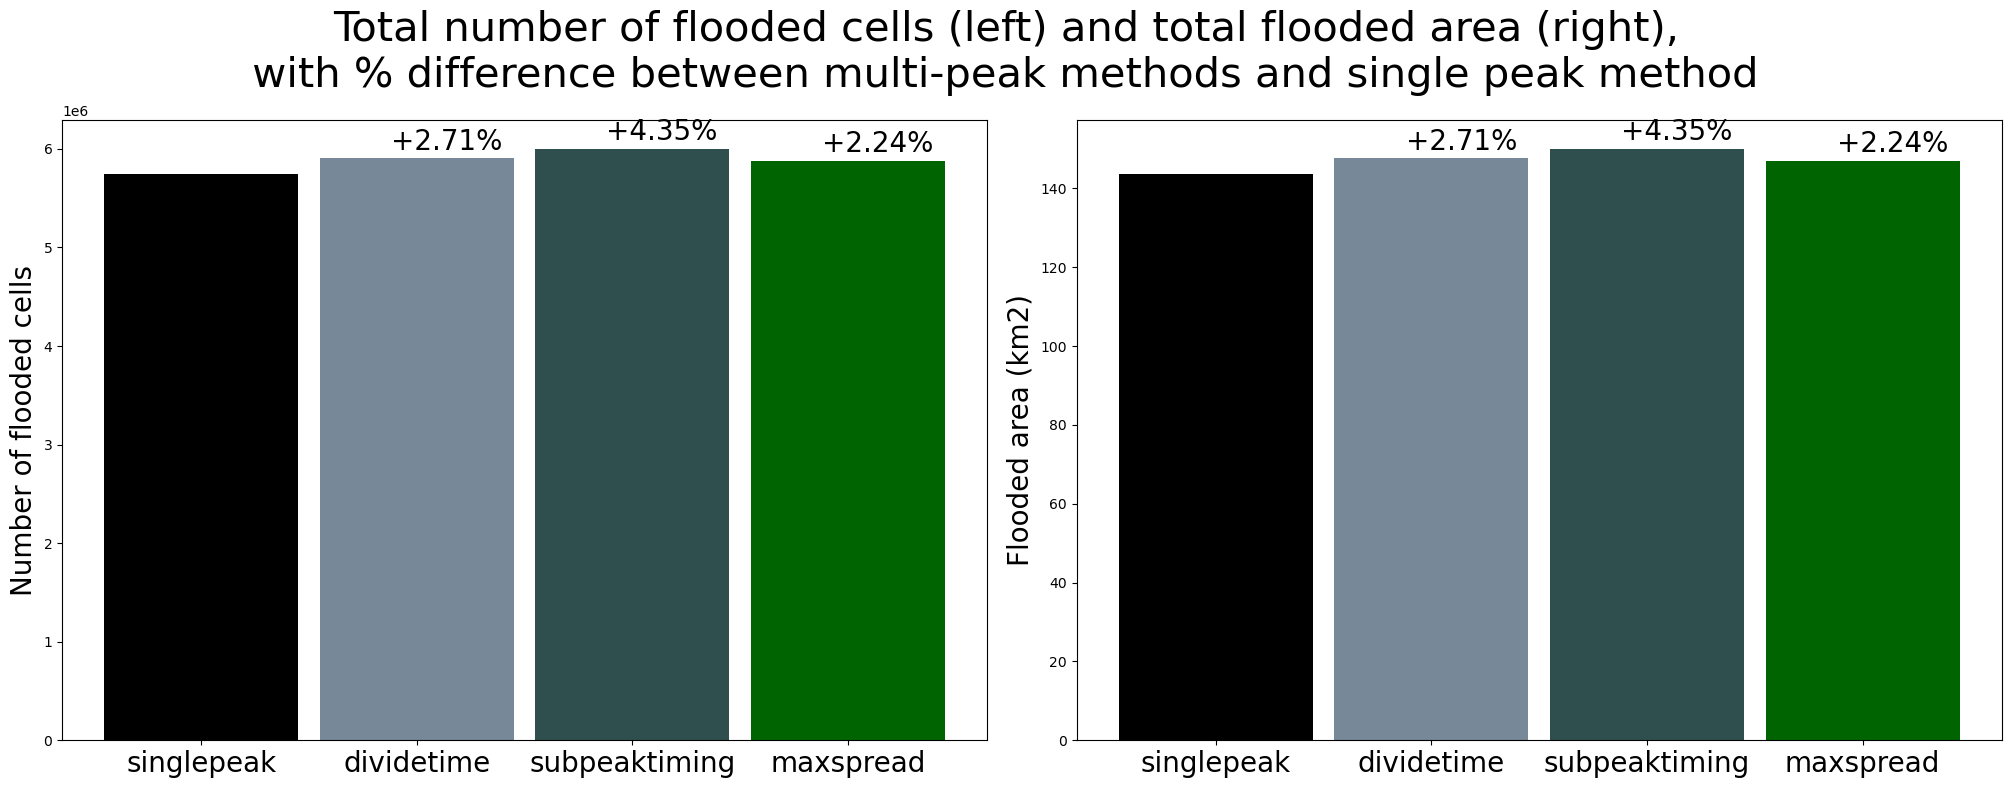

In [64]:
# Set colors for plots
colors = ['black', 'lightslategrey', 'darkslategrey', 'darkgreen']

fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (20,14))
y_pos = np.arange(len(methods.keys()))

##############################
# Plot number of flooded cells
##############################
plt.subplot(221)
plt.bar(y_pos, totals_df.iloc[[0]].values.tolist()[0], color=colors,
        width = 0.9)
# Create names on the x-axis
plt.xticks(y_pos, methods.keys(), fontsize =20)
# plt.xlabel('Method')
plt.ylabel('Number of flooded cells', fontsize =20)

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]

for i, v in enumerate(totals_df.iloc[[0]].values.tolist()[0]):
    plt.text(xlocs[i] - 1.12, v * 1.015, str(ls[i]), fontsize = 20)

# ##############################
# # Plot flooded extent in m2
# ##############################
plt.subplot(222)
plt.bar(y_pos, totals_df_area.iloc[[0]].values.tolist()[0], color=colors,
        width = 0.9)
# Create names on the x-axis
plt.xticks(y_pos, methods.keys(), fontsize =20 )
# plt.xlabel('Method')
plt.ylabel('Flooded area (km2)', fontsize =20 )

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]

for i, v in enumerate(totals_df_area.iloc[[0]].values.tolist()[0]):
    plt.text(xlocs[i] - 1.12, v * 1.015, str(ls[i]), fontsize = 20)

st = plt.suptitle ("Total number of flooded cells (left) and total flooded area (right),\n with % difference between multi-peak methods and single peak method ", fontsize = 30)

# Flood depth and velocity

To examine whether the rainfall's temporal distribution influences the spatial extent of flooding, the flood depths and velocities (excluding areas below 0.1m) are compared for each of the four distribution methods.  

To highlight particular areas where the rainfall distributions with multiple peaks might have led to substantially more or less flooding than the single peak method, the difference between the single peak method and each of the other three multi-peaked methods are plotted. A positive difference implies that the flooding is deeper/faster in the single peak method, whilst a negative difference implies the opposite. 

## Spatial extent of flooding, by depth category (for d >0.1m) for each rainfall distribution

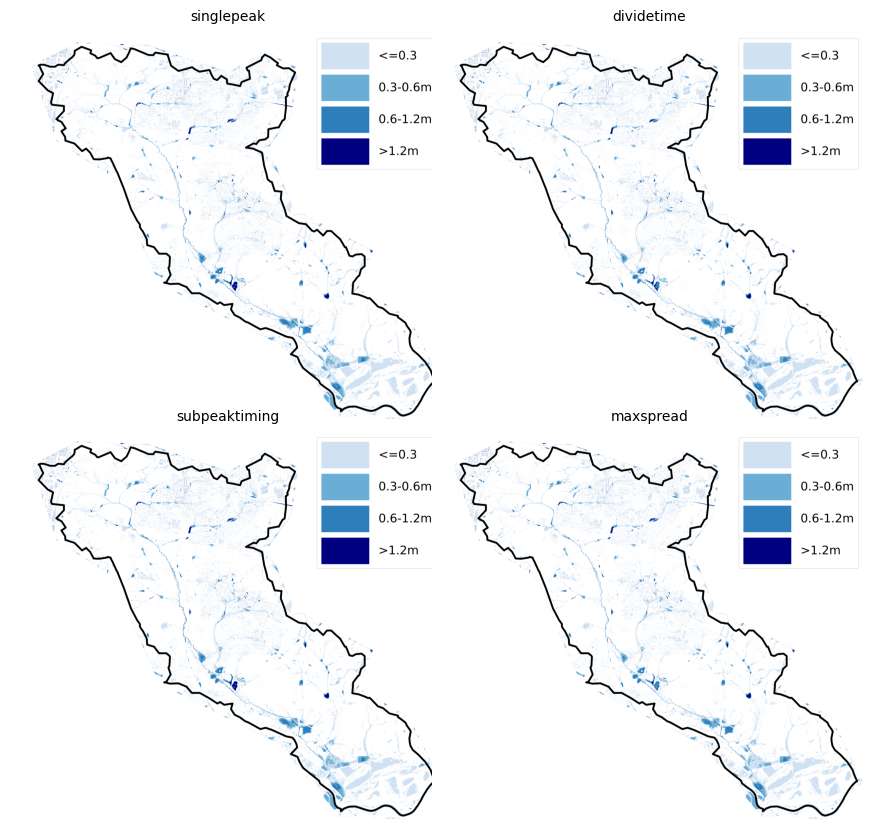

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
subplot_n = [221, 222, 223, 224]
subplot_i = 0

for subplot_i, method in enumerate(methods):
    img = Image.open("Arcpy/Figs/classified_depth_{}.png".format(method))
    plt.subplot(subplot_n[subplot_i])
    plt.axis('off')
    plt.imshow(img)
    plt.title(method, fontsize = 10)
fig.tight_layout()
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.5, top=0.5, wspace=-0.4, hspace=0)
# plt.show()    
plt.show()

## Spatial extent of flooding, by velocity category (for d >0.1m) for each rainfall distribution

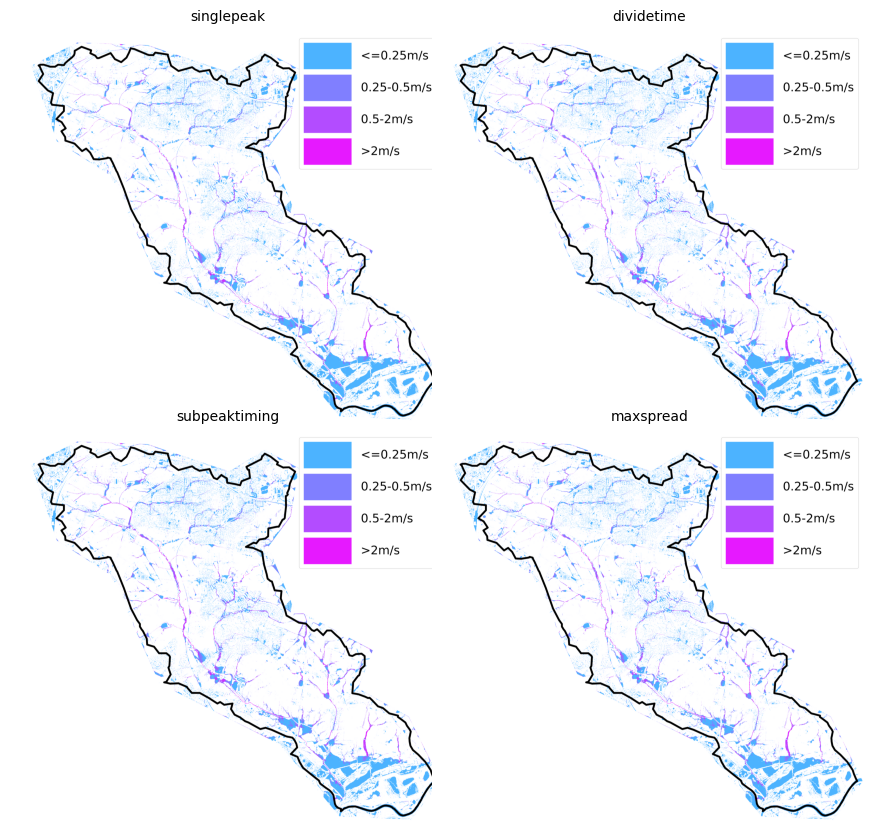

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
subplot_n = [221, 222, 223, 224]
subplot_i = 0

for subplot_i, method in enumerate(methods):
    img = Image.open("Arcpy/Figs/classified_velocity_{}.png".format(method))
    plt.subplot(subplot_n[subplot_i])
    plt.axis('off')
    plt.imshow(img)
    plt.title(method, fontsize = 10)
fig.tight_layout()
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.5, top=0.5, wspace=-0.4, hspace=0)
# plt.show()    
plt.show()

## Difference in flood depth between a single peak  and each of the multi-peaked methods
A positive difference implies that the flooding is deeper in the single peak method, whilst a negative difference implies the opposite. 

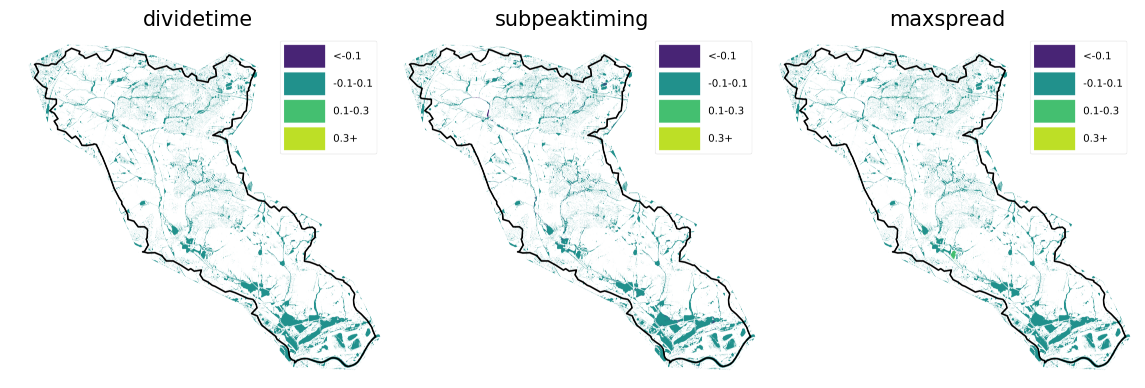

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,30))
subplot_n = [131,132, 133]
subplot_i = 0

for subplot_i, method in enumerate(methods):
    if method != 'singlepeak':
        img = Image.open("Arcpy/Figs/classified_depth_singlepeak_{}_diff.png".format(method))
        plt.subplot(subplot_n[subplot_i-1])
        plt.axis('off')
        plt.imshow(img)
        plt.title(method, fontsize = 15)
fig.tight_layout()
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.5, top=0.5, wspace=0, hspace=0)
# plt.show()    
plt.show()

## Difference in flood velocity between a single peak  and each of the multi-peaked methods
A positive difference implies that the flooding is deeper/faster in the single peak method, whilst a negative difference implies the opposite. 

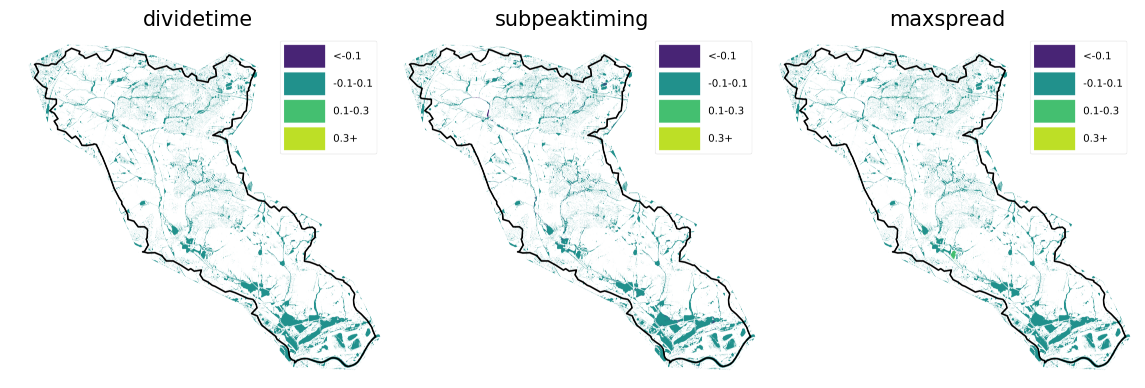

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,30))
subplot_n = [131,132, 133]
subplot_i = 0

for subplot_i, method in enumerate(methods):
    if method != 'singlepeak':
        img = Image.open("Arcpy/Figs/classified_velocity_singlepeak_{}_diff.png".format(method))
        plt.subplot(subplot_n[subplot_i-1])
        plt.axis('off')
        plt.imshow(img)
        plt.title(method, fontsize = 15)
fig.tight_layout()
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.5, top=0.5, wspace=0, hspace=0)
# plt.show()    
plt.show()

##  Number and proportion of flooded cells with different depth and velocity categories

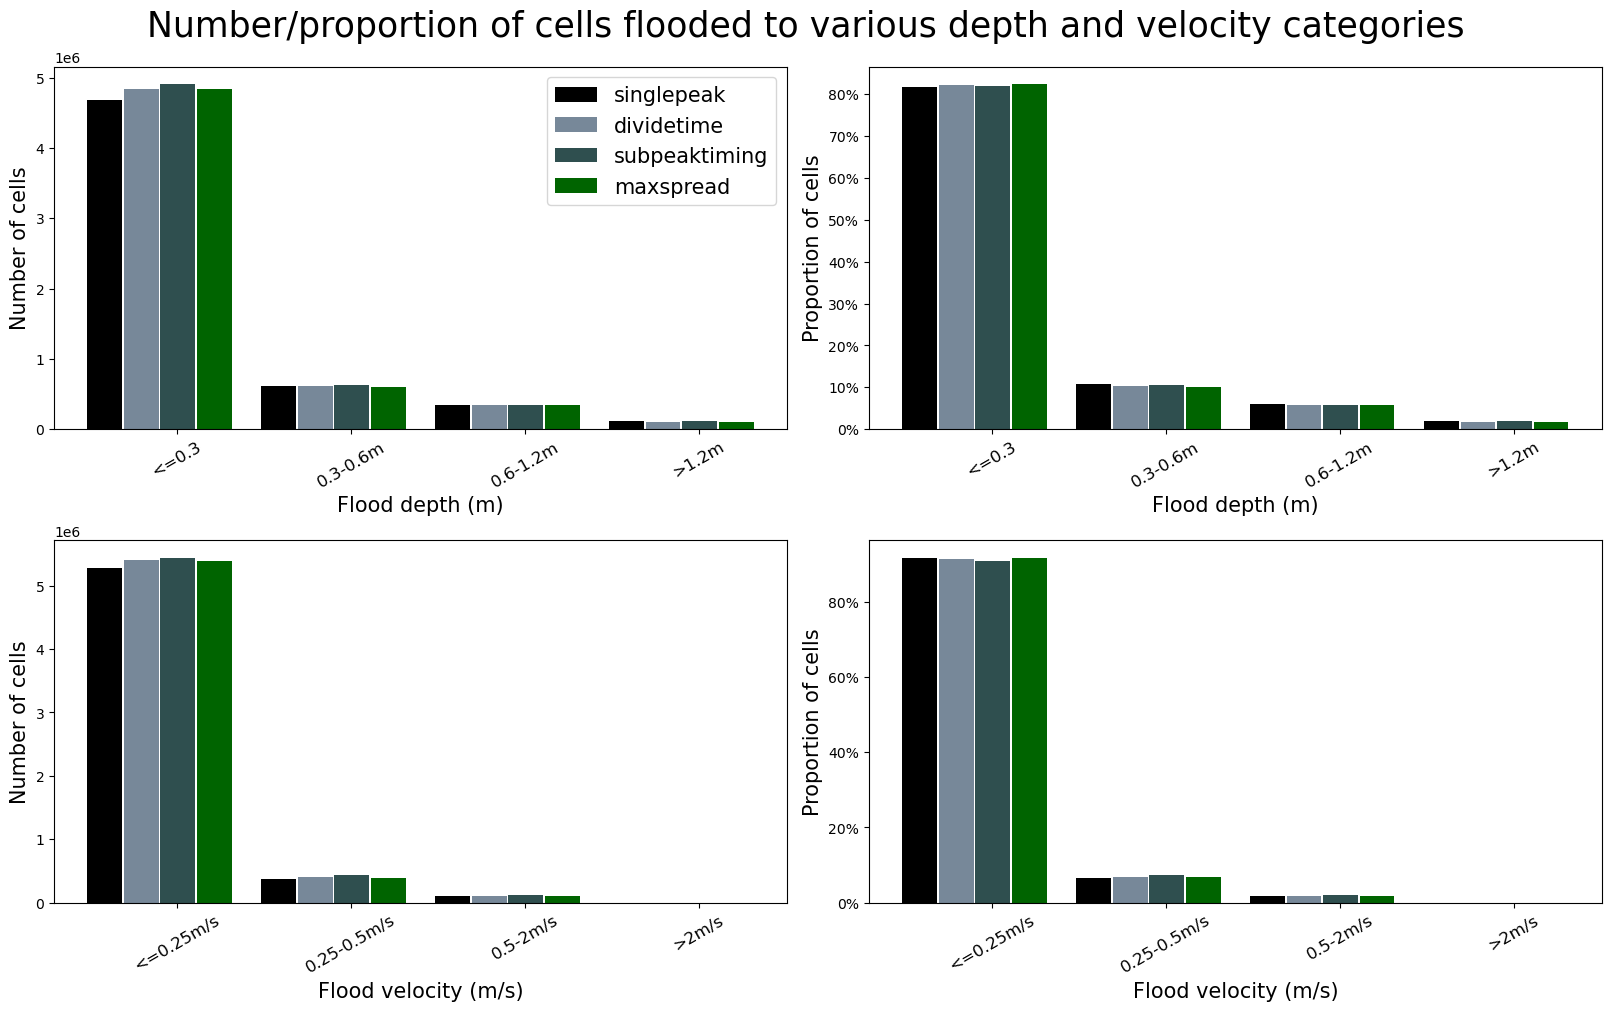

In [65]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize = (16,10))
fig.suptitle('Number/proportion of cells flooded to various depth and velocity categories', fontsize = 25)
subplot_n = [221, 222, 223, 224]
subplot_i = 0

units_dict = {'depth': 'm', 'velocity': 'm/s'}    

for row, variable in enumerate(["depth", "velocity"]):

    counts_df = results_dict['{}_counts'.format(variable)]
    proportions_df = results_dict['{}_props'.format(variable)]
    
    ################# Plot
    labels = counts_df['index']
    x = np.arange(len(counts_df['index']))
    width = 0.3
    
    # counts_df plotting
    width, DistBetweenBars, Num = 0.2, 0.01, 4 # width of each bar, distance between bars, number of bars in a group
    # calculate the width of the grouped bars (including the distance between the individual bars)
    WithGroupedBars = Num*width + (Num-1)*DistBetweenBars
    plt.subplot(subplot_n[subplot_i])
    for i in range(Num):
        plt.bar(np.arange(len(counts_df))-WithGroupedBars/2 + (width+DistBetweenBars)*i, counts_df.iloc[:,i+1], width, 
                color = colors[i])
    plt.xticks(np.arange(len(counts_df['index'])), counts_df['index'], rotation=30, fontsize = 12)
    plt.xlabel('Flood {} ({})'.format(variable, units_dict[variable]), fontsize = 15)
    plt.ylabel('Number of cells', fontsize = 15)
    # Put legend on top left plot
    if subplot_i == 0:
        plt.legend(counts_df.columns[1:], fontsize=15, frameon = True)
   
    # Proportions_df plotting
    subplot_i = subplot_i+ 1        
    plt.subplot(subplot_n[subplot_i])
    for i in range(Num):
        plt.bar(np.arange(len(counts_df))-WithGroupedBars/2 + (width+DistBetweenBars)*i, proportions_df.iloc[:,i+1], width, 
                color = colors[i])
    plt.xticks(np.arange(len(proportions_df['index'])), proportions_df['index'], rotation=30, fontsize = 12)
    plt.xlabel('Flood {} ({})'.format(variable, units_dict[variable]), fontsize = 15)
    plt.ylabel('Proportion of cells', fontsize = 15)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    subplot_i = subplot_i+ 1 


## Proportion of total num flooded cells from each depth/velocity category

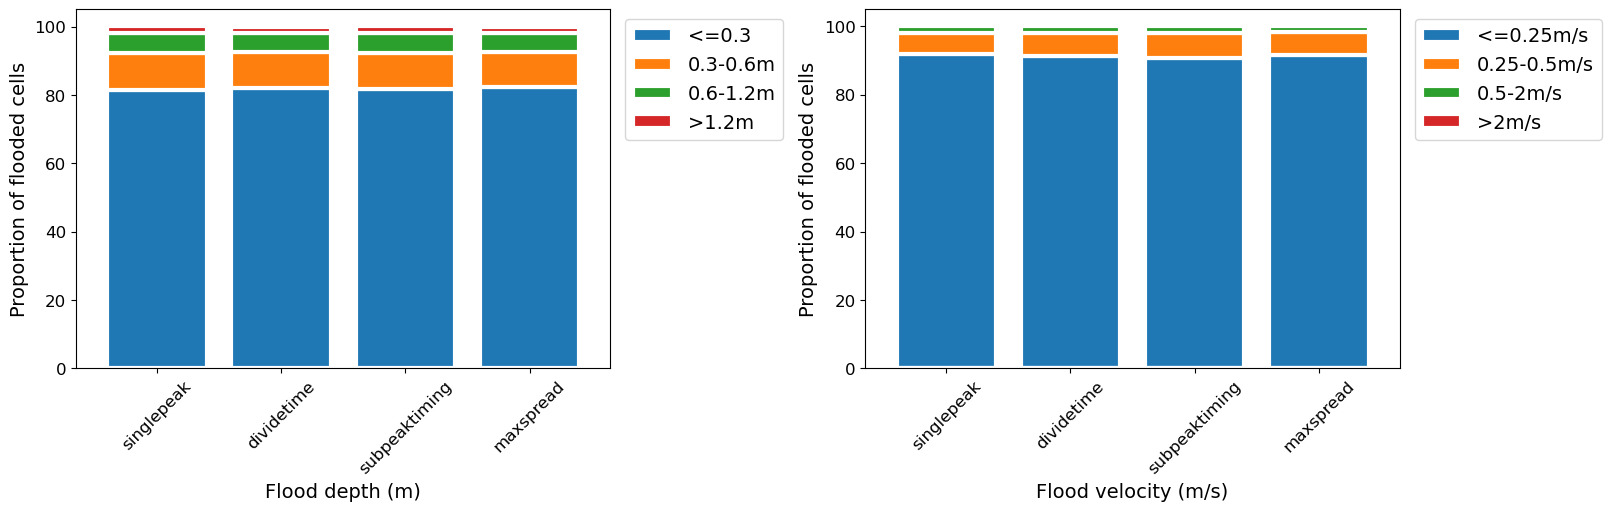

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (16,5))
# fig.suptitle('Number/proportion of cells flooded to various depth and velocity categories', fontsize = 25)
subplot_n = [221, 222]

units_dict = {'depth': 'm', 'velocity': 'm/s'}    

for row, variable in enumerate(["depth", "velocity"]):
    # Get the dataframes
    counts_df = results_dict['{}_counts'.format(variable)]
    proportions_df = results_dict['{}_props'.format(variable)]
    
    # reformat the dataframe for stacked plotting
    reformatted_df  =proportions_df.T[1:]
    if row == 1:
        reformatted_df.columns = labels_velocity
    else:
        reformatted_df.columns = labels_depth
    # Plot
    # width = 1 / len(bar_lefts)
    reformatted_df.plot(ax=axs[row], kind='bar', edgecolor='white', linewidth=3, stacked = True, width =0.8, rot =45,
                         xlabel = 'Flood {} ({})'.format(variable, units_dict[variable]),
                            ylabel = 'Proportion of flooded cells', fontsize = 12)
    # reformatted_df.plot.bar(ax=axs[row], rot=0, stacked = True, xlabel = 'Flood {} ({})'.format(variable, units_dict[variable]),
    #                         ylabel = 'Proportion of flooded cells', fontsize = 12)
    plt.rcParams.update({'font.size': 14})
    axs[row].legend(bbox_to_anchor=(1.01, 1), loc='upper left')

## Number of cells in which each method leads to the worst flooding (depth/velocity)
Check what happens in the case where the flood depth/velocity is equal

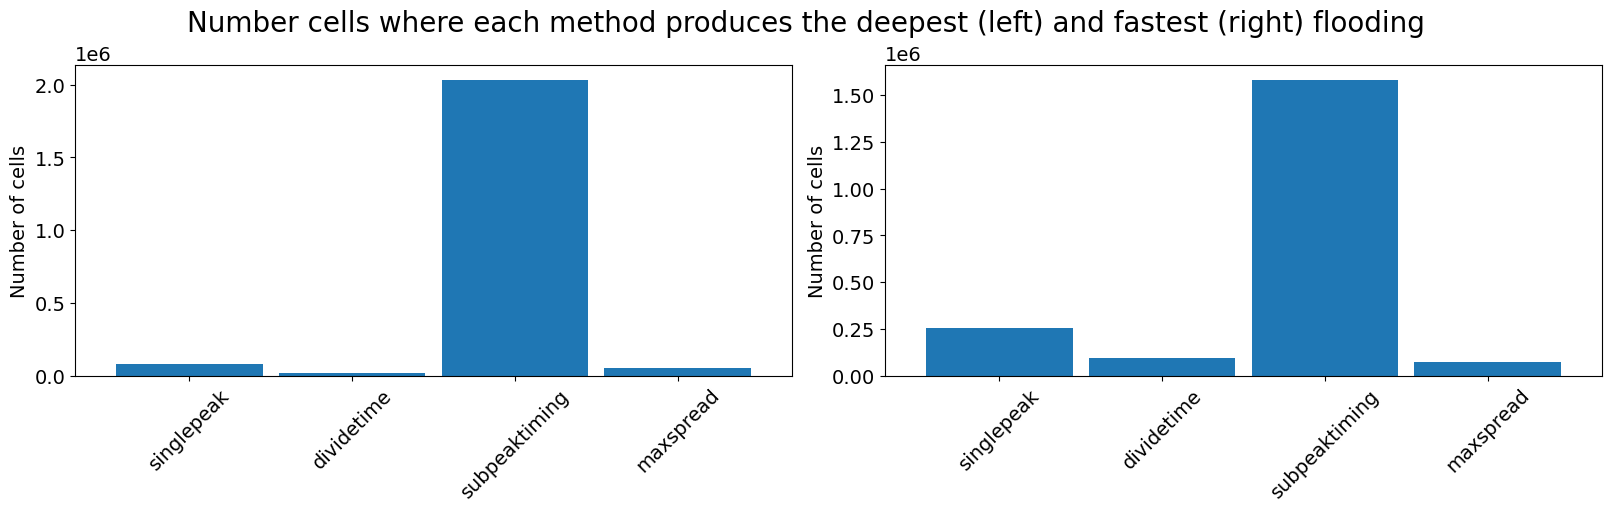

In [163]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (16,5))
fig.suptitle('Number cells where each method produces the deepest (left) and fastest (right) flooding', fontsize = 20)
subplot_n = [221, 222]
subplot_i = 0

for row, variable in enumerate(["depth", "velocity"]):
    if variable == 'depth':
        rasters_dict = depth_rasters_dict
    else:
        rasters_dict = velocity_rasters_dict
        
    worst_case_values =np.where((rasters_dict['singlepeak'] > rasters_dict['dividetime']) & (rasters_dict['singlepeak'] > rasters_dict['maxspread']) & (rasters_dict['singlepeak'] > rasters_dict['subpeaktiming']), rasters_dict['singlepeak'],
                         np.where((rasters_dict['dividetime'] > rasters_dict['subpeaktiming']) & (rasters_dict['dividetime'] > rasters_dict['maxspread']) & (rasters_dict['dividetime'] > rasters_dict['singlepeak']),rasters_dict['dividetime'],
                         np.where((rasters_dict['subpeaktiming'] > rasters_dict['dividetime']) & (rasters_dict['subpeaktiming'] > rasters_dict['maxspread']) & (rasters_dict['subpeaktiming'] > rasters_dict['singlepeak']), rasters_dict['subpeaktiming'],  
                         np.where((rasters_dict['maxspread'] > rasters_dict['dividetime']) & (rasters_dict['maxspread'] > rasters_dict['singlepeak']) & (rasters_dict['maxspread'] > rasters_dict['subpeaktiming']), rasters_dict['maxspread'],  
                         np.nan))))     
    # 0 = maxspread, 1 = singlepeak, 2 = subpeaktiming, 3 = dividetime
    worst_case_method =  np.where((rasters_dict['singlepeak'] > rasters_dict['dividetime']) & (rasters_dict['singlepeak'] > rasters_dict['maxspread']) & (rasters_dict['singlepeak'] > rasters_dict['subpeaktiming']), 0, 
                               np.where((rasters_dict['dividetime'] > rasters_dict['subpeaktiming']) & (rasters_dict['dividetime'] > rasters_dict['maxspread']) & (rasters_dict['dividetime'] > rasters_dict['singlepeak']),1,                    
                                np.where((rasters_dict['subpeaktiming'] > rasters_dict['dividetime']) & (rasters_dict['subpeaktiming'] > rasters_dict['maxspread']) & (rasters_dict['subpeaktiming'] > rasters_dict['singlepeak']), 2,  
                                np.where((rasters_dict['maxspread'] > rasters_dict['dividetime']) & (rasters_dict['maxspread'] > rasters_dict['singlepeak']) & (rasters_dict['maxspread'] > rasters_dict['subpeaktiming']), 3,   
                               np.nan))))     
    
    unique, counts = np.unique(worst_case_method, return_counts=True)
    worst_case_method_df = pd.DataFrame({'values': unique, 'counts':counts})
    
    worst_case_method_df = worst_case_method_df.iloc[:4,1]
    worst_case_method_df
    worst_case_method_df.index = ["singlepeak", "dividetime", "subpeaktiming", "maxspread"]
    worst_case_method_df.plot(ax= axs[row], kind ='bar',width=  0.9, rot =45, ylabel = 'Number of cells')    